In [1]:
"""
The code in this cell imports all of the relevant libraries that will be used in
the rest of the code
"""
import rt_utils
import sys
import numpy as np
from rt_utils import RTStructBuilder
import matplotlib.pyplot as plt

In [2]:
"""
The code in this cell loads in a DICOM series from 'dicom_series_path' and loads in an RTSTRUCT
file from 'rt_struct_path'. The user should make sure the RTSTRUCT file selected is the one that
corresponds to the chosen DICOM series. e.g. in this case both files used are for the LUNG1-001
data set.
"""
# Load existing RT Struct. Requires the series path and existing RT Struct path
rtstruct = RTStructBuilder.create_from(
  dicom_series_path="LUNG1-001/CT", 
  rt_struct_path="LUNG1-001/RTSTRUCT/3-2.dcm"
)

In [3]:
"""
The code in this cell prints the Region Of Interest (ROI) names for the user to choose from in 
the next cell.
"""
print(rtstruct.get_roi_names()) # View all of the ROI names from within the image

['GTV-1', 'Spinal-Cord', 'Lung-Left', 'Lung-Right']


In [4]:
"""
The code in this cell allows the user to choose the ROI which they wish the code to mask
"""
# Loading the 3D Mask from within the RT Struct
mask_3d = rtstruct.get_roi_mask_by_name("GTV-1") #Put in the name of the ROI

134


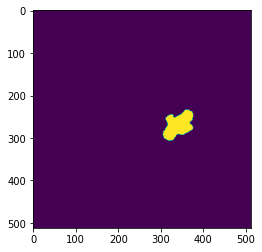

In [5]:
"""
DOES NOT NEED TO BE RUN
The code in this cell produces a plot of a user-selected slice. In the plot the ROI will appear
yellow, and non-ROI will appear purple. Want to change this to black-and-white at some point.
"""
# Display one slice of the region
first_mask_slice = mask_3d[:, :, 80] #the number defines which slice will be displayed
print(mask_3d.shape[2]) #prints the number of slices in the image (will be used when making an interactive plot)
plt.imshow(first_mask_slice)
plt.show()

In [ ]:
"""
NOT COMPLETE
I want the code in this cell to be a interactive matplotlib plot where the user can use the 
'left' and 'right' arrows to scroll through the slices of the DICOM series. Currently it
produces plots of al the plots but the user can only 'scroll' through them by closing the
plot window and then the next will open.

The 'hashed' code is one that works for a cosine plot.
"""
# for i in range(mask_3d.shape[2]) :
#    plt.title("Slice number " + str(i+1))
#    plt.imshow(mask_3d[:,:,i])
#    plt.show()

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


numbers = np.arange(mask_3d.shape[2])
slice_numbers = numbers + 1

plots = mask_3d

curr_pos = 0

def key_event(e):
    global curr_pos

    if e.key == "right" :
        curr_pos = curr_pos + 1
    elif e.key == "left" :
        curr_pos = curr_pos -1
    else :
        return
    curr_pos = curr_pos % len(plots)

    ax.cla()
    ax.plot(plots[curr_pos][0], plots[curr_pos][1])
    fig.canvas.draw()

fig = plt.figure()
fig.canvas.mpl_connect('key_press_event', key_event)
ax = fig.add_subplot(111)
ax.plot(t,temp_y)
plt.show()



# define your x and y arrays to be plotted
number_of_points = 25
t = np.linspace(start=0, stop=2*np.pi, num=number_of_points)
number_of_intervals = 50
delta_t = np.linspace(start = 0, stop = 2*np.pi, num = number_of_intervals)
plots = []
for i in range(number_of_intervals) :
    temp_y = np.cos(t+delta_t[i-1])
    temp_array = (t,temp_y)
    plots.append(temp_array)




# y1 = np.cos(t+0.1)
# y2 = np.cos(t+0.2)
# y3 = np.cos(t+0.3)
# plots = [(t,y1), (t,y2), (t,y3)]

# now the real code :) 
curr_pos = 0

def key_event(e):
    global curr_pos

    if e.key == "right":
        curr_pos = curr_pos + 1
    elif e.key == "left":
        curr_pos = curr_pos - 1
    else:
        return
    curr_pos = curr_pos % len(plots)

    ax.cla()
    ax.plot(plots[curr_pos][0], plots[curr_pos][1])
    fig.canvas.draw()

fig = plt.figure()
fig.canvas.mpl_connect('key_press_event', key_event)
ax = fig.add_subplot(111)
ax.plot(t,temp_y)
plt.show()

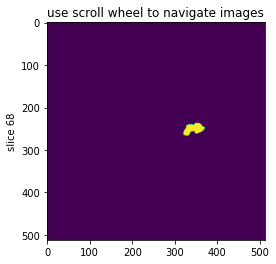

In [13]:
"""
The code in this cell produces a matplotlib plot of the mask slices which
can be 'scrolled' through using the mouse scroll wheel. 
NOTE: this does not work in a Jupyter notebook and must be run in a pop up for
it to work. I need to see if I can fix this.
"""
class IndexTracker:
    def __init__(self, ax, X):
        self.ax = ax
        ax.set_title('use scroll wheel to navigate images')

        self.X = X
        rows, cols, self.slices = X.shape
        self.ind = self.slices//2

        self.im = ax.imshow(self.X[:, :, self.ind])
        self.update()

    def on_scroll(self, event):
        print("%s %s" % (event.button, event.step))
        if event.button == 'up':
            self.ind = (self.ind + 1) % self.slices
        else:
            self.ind = (self.ind - 1) % self.slices
        self.update()

    def update(self):
        self.im.set_data(self.X[:, :, self.ind])
        self.ax.set_ylabel('slice %s' % (self.ind +1))
        self.im.axes.figure.canvas.draw()

fig, ax = plt.subplots(1, 1)

X = mask_3d

tracker = IndexTracker(ax, mask_3d)


fig.canvas.mpl_connect('scroll_event', tracker.on_scroll)
plt.show()

In [ ]:
"""
The code in this cell prints all of the elements of mask_3d. I think this is limited 
by the size of the terminal so the user won't see all of the elements anyway.
"""
with np.printoptions(threshold=sys.maxsize): #could also use threshold = np.inf
      print(mask_3d)

In [ ]:
"""
NOT NECESSARY TO BE RUN
The code in this cell runs through a user specified slice and counts the number of 'True'
elements.
"""
true_counter = 0
mask_test = mask_3d[:,:,80] #Change the number to choose the slice
for row in mask_test:
    for cell in row:
        cell = str(cell)
        if cell == "True" :
          true_counter +=1
          print(true_counter)
          print("True")
print(true_counter)

#print(np.arange(mask_3d.shape[2]))

In [ ]:
"""
The code below will iterate through all the elements in a mask_3d variable (as made
earlier in the code). It counts the number of 'True' elements in each slice of the DICOM.
It tells the user how many 'True' elements there are in each slice. This was initially
made to test if there were any non 'False' elements but could be used in the future on
resampled DICOM files, where each voxel is 1mm*1mm*1mm, so has a volume of 1mm^3, to calculate
volume of the tumour.
"""

numbers = np.arange(mask_3d.shape[2])
slice_numbers = numbers + 1
print(slice_numbers)

true_counter=0
for i in (slice_numbers - 1):
  true_counter_i = 0
  mask_test = mask_3d[:,:,i]
  for row in mask_test:
    for cell in row:
        cell = str(cell)
        if cell == "True" :
          true_counter_i +=1
          #print(true_counter_i)
          #print("True")
  true_counter += true_counter_i
  print("The number of True in slice " + str(i+1) + " is " + str(true_counter_i))
print(true_counter)